#  6.5 Unsupervised Machine Learning: Clustering

##  This script contains the following:

###  1.  Importing libraries and data

###  2.  The elbow technique

###  3.  k-means clustering

## 1.  Importing libraries and data

In [1]:
# Imporing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Creating path
path = r'/Users/andrewruhnow/Documents/World Happiness Report 2015-2019'

In [4]:
path

'/Users/andrewruhnow/Documents/World Happiness Report 2015-2019'

In [5]:
# Importing data
df_happiness = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_merged_all_years.pkl'))

In [6]:
df_happiness.shape

(782, 10)

In [7]:
df_happiness.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [8]:
# Dropping non-numeric columns from dataset to perform k-means algorithm
df_happiness = df_happiness.drop(['Country', 'Happiness Rank', 'Year'], axis = 1)

In [9]:
df_happiness.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [10]:
df_happiness.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [14]:
# Checking for NaN values
nan_values = df_happiness.isna().sum()

In [15]:
print("NaN values count in each column:")
print(nan_values)

NaN values count in each column:
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64


In [20]:
# Removing rows containing NaN values
df_cleaned_rows = df_happiness.dropna()

In [21]:
print("DataFrame after removing NaN values:")
print(df_cleaned_rows)

DataFrame after removing NaN values:
     Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
2              7.527                   1.32548  1.36058   
3              7.522                   1.45900  1.33095   
4              7.427                   1.32629  1.32261   
..               ...                       ...      ...   
777            3.334                   0.35900  0.71100   
778            3.231                   0.47600  0.88500   
779            3.203                   0.35000  0.51700   
780            3.083                   0.02600  0.00000   
781            2.853                   0.30600  0.57500   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64

##  2.  The elbow technique

In [22]:
# Defining the range of potential clusters in the data and defining k-means clusters in the range assigned above.
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [24]:
score = [kmeans[i].fit(df_cleaned_rows).score(df_cleaned_rows) for i in range(len(kmeans))]

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

In [25]:
score

[-1290.5537117644444,
 -487.63686206846637,
 -305.99183656416596,
 -236.56004286622448,
 -193.59616965056463,
 -176.18932444096313,
 -161.86042099103912,
 -151.22374608686147,
 -143.69338239378658]

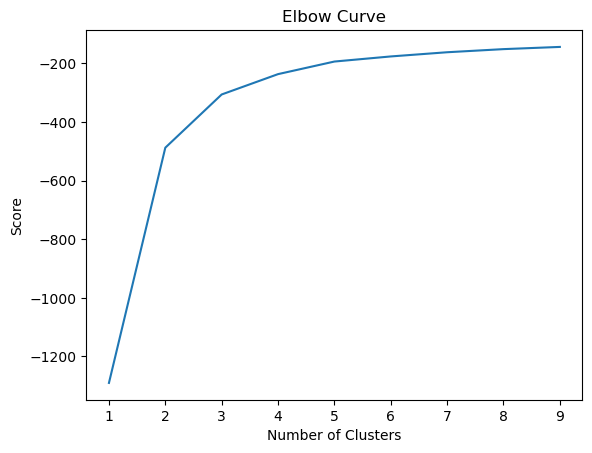

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  There's a large jump from two to three on the x-axis, after that the curve straightens out. This means that the optimal count for clusters is three.

##  3.  k-means clustering

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_cleaned_rows)

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [29]:
df_cleaned_rows['clusters'] = kmeans.fit_predict(df_cleaned_rows)

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_14935/1521228759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_rows['clusters'] = kmeans.fit_predict(df_cleaned_rows)


In [32]:
df_cleaned_rows.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [33]:
df_cleaned_rows['clusters'].value_counts()

clusters
2    308
1    278
0    195
Name: count, dtype: int64

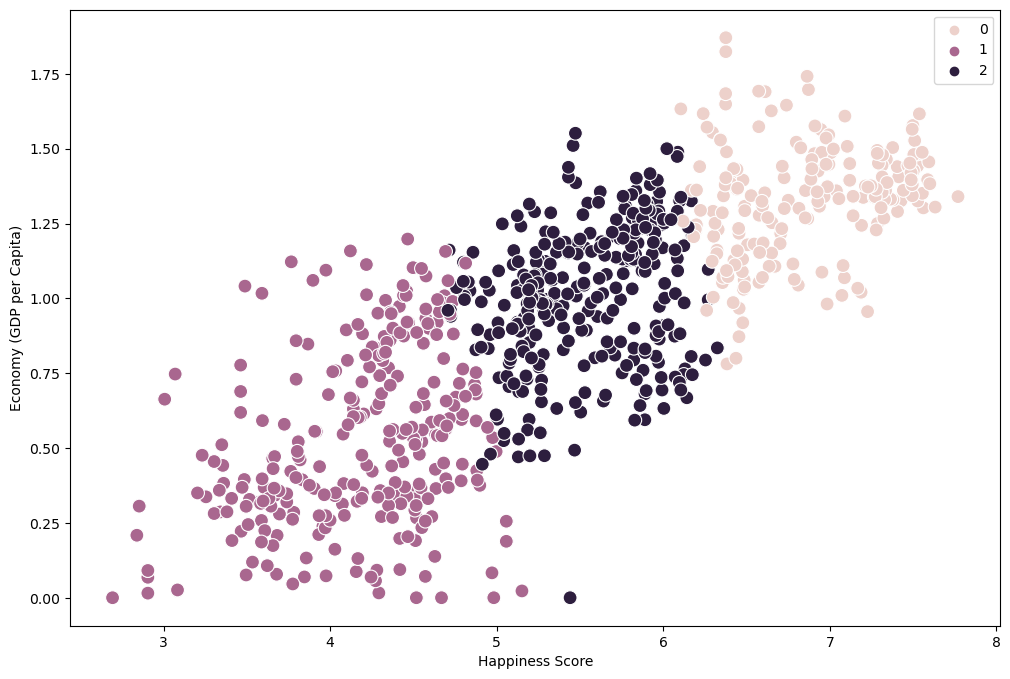

In [36]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_rows['Happiness Score'], y=df_cleaned_rows['Economy (GDP per Capita)'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Economy (GDP per Capita)') # Label y-axis.
plt.show()

####  Economy (GDP per Capita) vs Happiness Score:  Majority of the clusters are in the “1” cluster which are lower Economy scores have a lower Happiness score.  The scatterplot trends upward left to right which is showing the higher the Economy score the higher the Happiness Score.

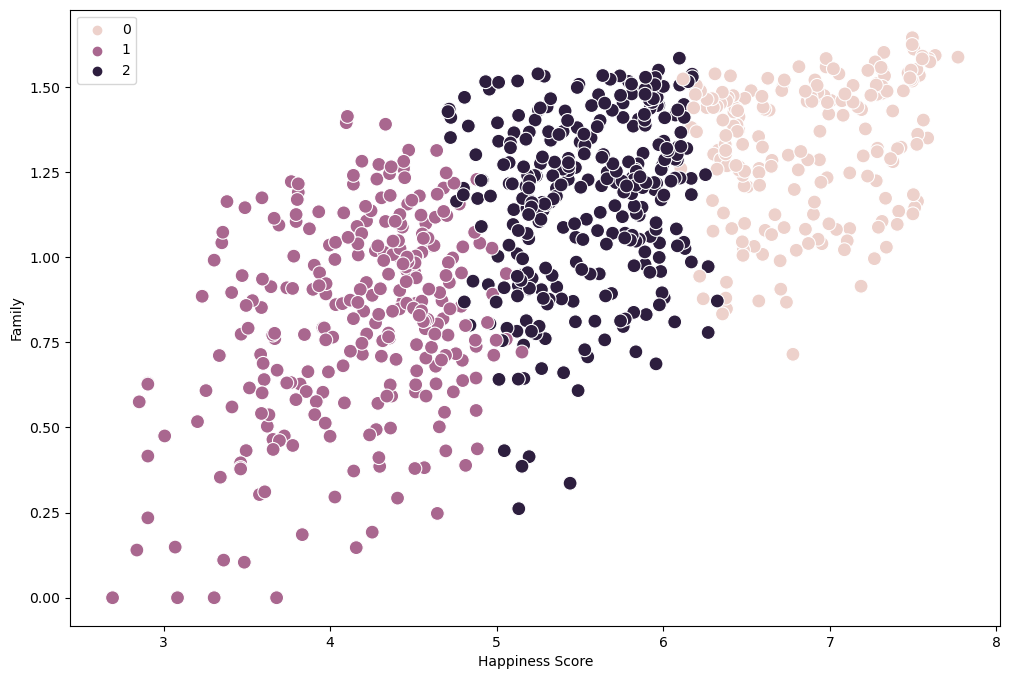

In [37]:
# Plot the clusters for the "Happiness Score" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_rows['Happiness Score'], y=df_cleaned_rows['Family'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Family') # Label y-axis.
plt.show()

####  Family vs Happiness Score:  Majority of the clusters are in the “1” cluster which are lower Family scores have a lower Happiness score.  The scatterplot trends upward left to right which is showing the higher the Family score the higher the Happiness Score.  However, clusters “0,2” Happiness Scores range from 5-8 but have similar higher Family score clustering which tells me that a country can have a higher family score but still have a lower happiness score.

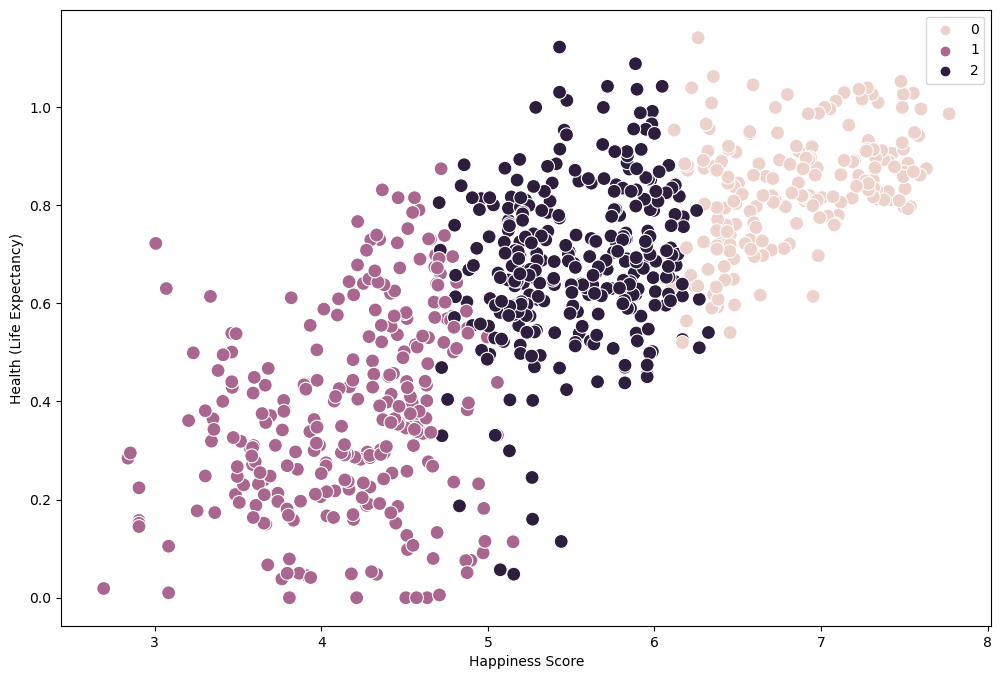

In [38]:
# Plot the clusters for the "Happiness Score" and "Health (Life Expectancy)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_rows['Happiness Score'], y=df_cleaned_rows['Health (Life Expectancy)'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Health (Life Expectancy)') # Label y-axis.
plt.show()

####  Health (Life Expectancy) vs Happiness Score:  Majority of the clusters are in the “1” cluster which are lower Health (Life Expectancy) have a lower Happiness score.  The scatterplot trends upward left to right which is showing the higher the Health (Life Expectancy) score the higher the Happiness Score.

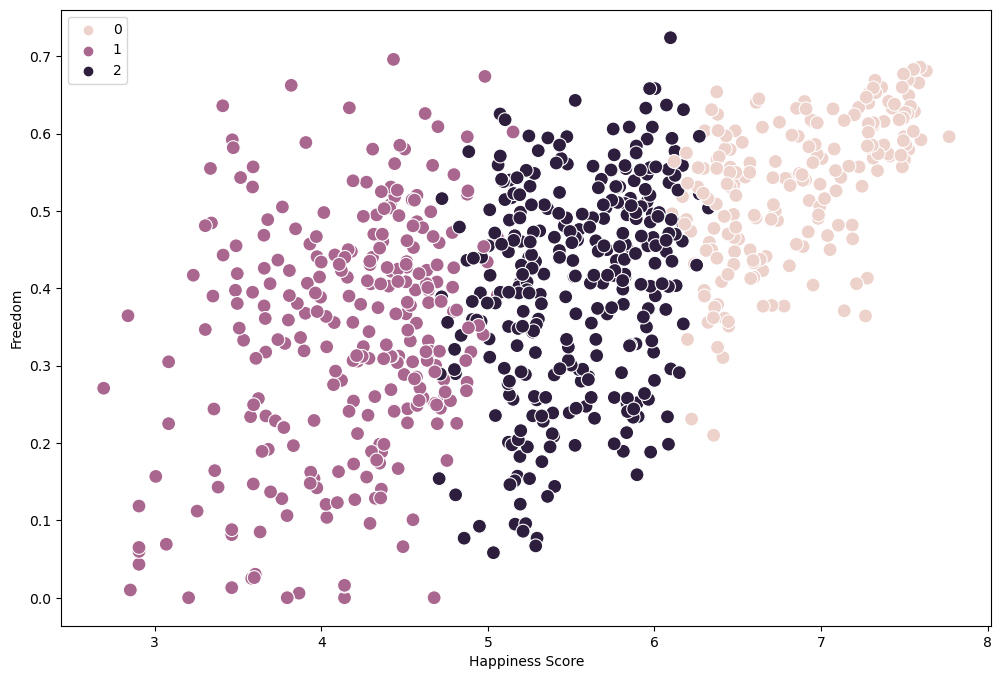

In [39]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_rows['Happiness Score'], y=df_cleaned_rows['Freedom'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Freedom') # Label y-axis.
plt.show()

####  Freedom vs Happiness Score:  Cluster “1” doesn’t make sense to me cause it’s very spread out.  It’s showing lower Happiness Scores but the clusters range from 0.0 to 0.7 Freedom score.

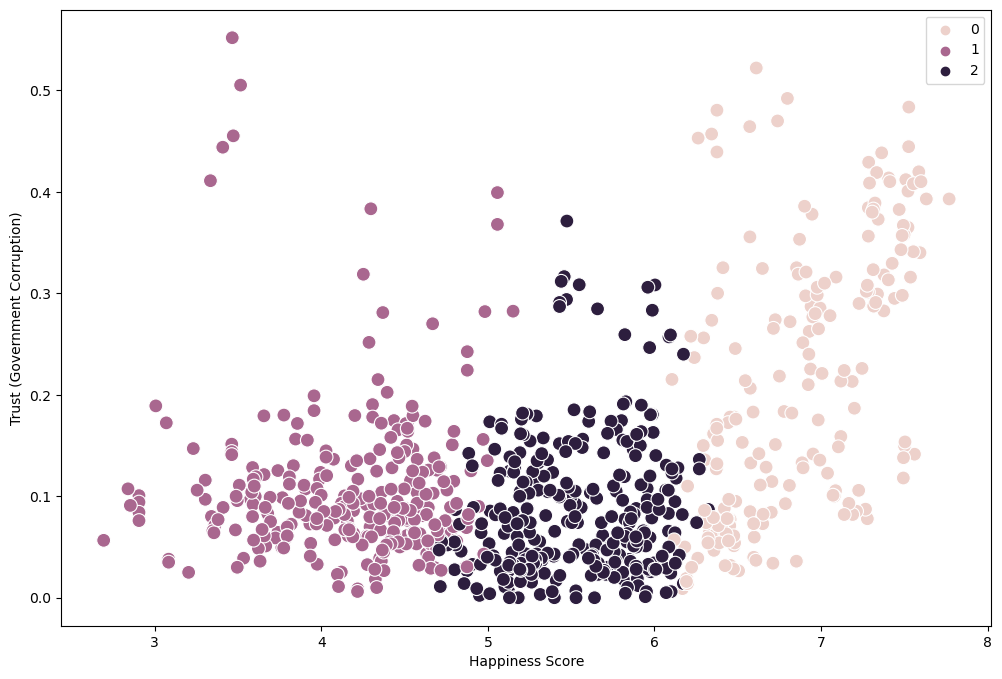

In [40]:
# Plot the clusters for the "Happiness Score" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_rows['Happiness Score'], y=df_cleaned_rows['Trust (Government Corruption)'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Trust (Government Corruption)') # Label y-axis.
plt.show()

####  Trust (Government Corruption) vs Happiness Score:  This scatterplot doesn’t make sense to me as well cause majority of the clusters “1,2” have low Trust scores but the Happiness Scores range 3-6 and cluster “0” ranges from 0.0-0.5 which doesn’t make sense to me.

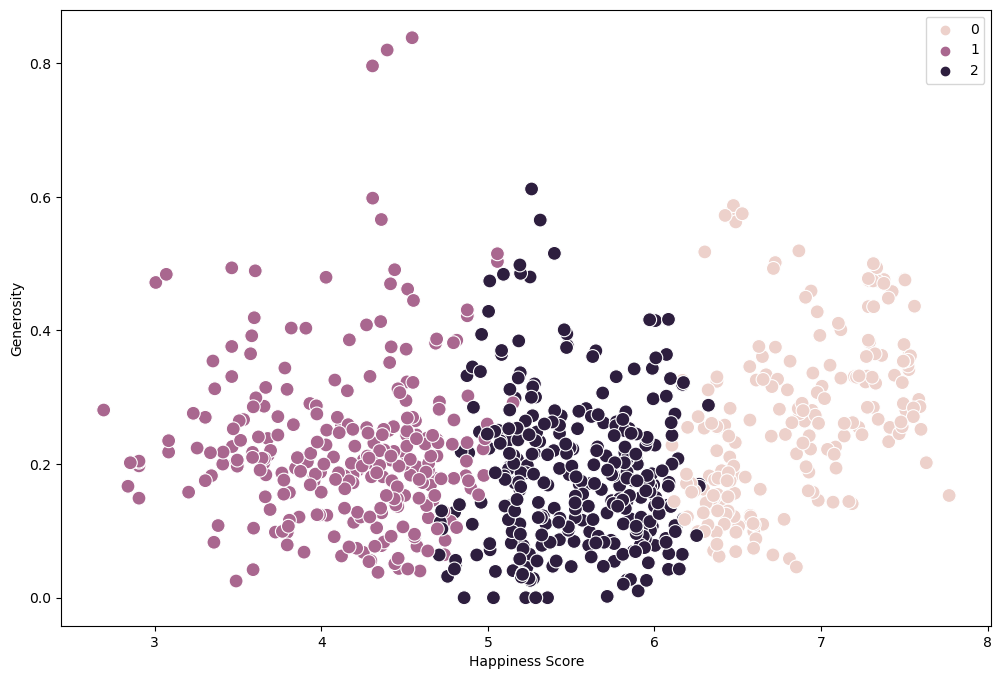

In [41]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_rows['Happiness Score'], y=df_cleaned_rows['Generosity'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Generosity') # Label y-axis.
plt.show()

####  Generosity vs Happiness Score:   All three clusters have a lower Generosity scores 0.0-0.6 yet the Happiness Scores range 3-8 which to me means the Generosity score doesn’t have much impact on the Happiness Score.

In [44]:
df_cleaned_rows.loc[df_cleaned_rows['clusters'] == 2, 'cluster'] = 'dark purple'
df_cleaned_rows.loc[df_cleaned_rows['clusters'] == 1, 'cluster'] = 'purple'
df_cleaned_rows.loc[df_cleaned_rows['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_14935/3147989639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_rows.loc[df_cleaned_rows['clusters'] == 2, 'cluster'] = 'dark purple'


In [47]:
df_cleaned_rows.groupby('cluster').agg({'Economy (GDP per Capita)':['mean', 'median'], 
                         'Freedom':['mean', 'median'], 
                        'Generosity':['mean', 'median'],
                         'Health (Life Expectancy)':['mean', 'median'],
                          'Trust (Government Corruption)':['mean', 'median']})

Economy (GDP per Capita)             Freedom           Generosity  \
                                mean    median      mean    median       mean   
cluster                                                                         
dark purple                 1.008559  1.024820  0.401686  0.418136   0.183293   
pink                        1.330339  1.343000  0.533301  0.550110   0.268112   
purple                      0.518708  0.471775  0.336245  0.353500   0.223037   

                      Health (Life Expectancy)            \
               median                     mean    median   
cluster                                                    
dark purple  0.172040                 0.684433  0.684500   
pink         0.261000                 0.834437  0.838404   
purple       0.204015                 0.376685  0.359870   

            Trust (Government Corruption)           
                                     mean   median  
cluster                                             
dark purple                      0.086027  0.07149  
pink                             0.214521  0.18676  
purple                           0.106609  0.08842

####  Q10.  I think the k-means clustering is a good way to see possible patterns and insights in the data.  It's interesting that a few of the k-means scatterplots look similar to the other visualizations previously created in other tasks.  Possible next steps would be to look into the Freedom, Trust (Government Corruption, and Generosity data.  It baffles me that the scatterplots look the way they do for those three variables.  